# 应用最小二乘法拟合曲线
## 残差=f(x)- y

* 最小二乘法就是使得残差的最小平方和最小
### 例子 用目标函数y=sinx+x,加上一个均匀分布的噪音干扰，用多项式拟合








# 思路
1、生成一个目标函数
2、生成一个均匀分布的噪声
3、生成实例点，符合这个目标函数
4、生成多项式函数 numpy.polyld([1,2,3])生成1*x^2+2*x+3
5、最小化残差，使用最小二乘法 调用 leastsq 方法
6、得到最优的参数向量w
7、画出拟合图
8、正则化 公式（1）L2范数，λ*w^2/2 公式（2）L1范数，λ*(w^2)^0.5





In [1]:
import numpy as np
import matplotlib.pyplot as plt
#生成一个目标函数
#由于后面需要多次取值，所以定义函数封装
from scipy.optimize import leastsq
def func_base(x):
    f=np.sin(2*x+5)+np.sin(x)+np.cos(3*x)
    return f



In [2]:
#生成一个均匀分布的噪声
noise=np.random.uniform(-1,1,10)

#生成20个实例点
x_point=np.linspace(0,10,10)
y_point=func_base(x_point)+noise
#显示图形
#显示分布
x_distrubite=np.linspace(0,10,1000)
y_distrubite=func_base(x_distrubite)



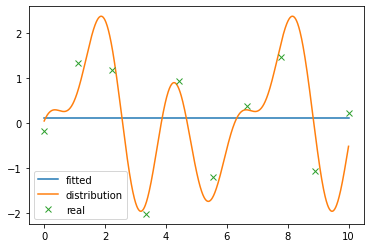

In [3]:
#构建多项式
def fit_func(w,x):

    f=np.poly1d(w)#得到多项式函数,w为权向量,f内含变量x
    return f(x)
#构建残差函数
def residual_func(w,x,y):

    res=fit_func(w,x)-y
    return res
#生成随机项的多项式

#调用np.random.rand(),生成数组，符合范围为[0，1）的均匀分布





#leastsq返回最优的w


w_lsq=leastsq(residual_func,np.random.rand(1),args=(x_point,y_point))
#可视化
plt.plot(x_point,fit_func(w_lsq[0],x_point),label="fitted")
plt.plot(x_distrubite,y_distrubite,label="distribution")
plt.plot(x_point,y_point,"x",label="real")
plt.legend()
pass
#当多项式次数为0











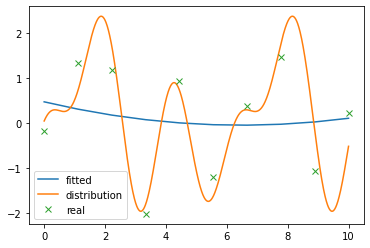

In [4]:
#当多项式次数为2
w_lsq=leastsq(residual_func,np.random.rand(3),args=(x_point,y_point))
plt.plot(x_point,fit_func(w_lsq[0],x_point),label="fitted")
plt.plot(x_distrubite,y_distrubite,label="distribution")
plt.plot(x_point,y_point,"x",label="real")
plt.legend()


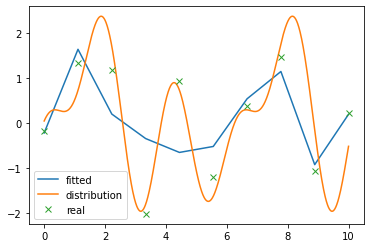

In [5]:
#当多项式次数为8

w_lsq=leastsq(residual_func,np.random.rand(8),args=(x_point,y_point))
plt.plot(x_point,fit_func(w_lsq[0],x_point),label="fitted")
plt.plot(x_distrubite,y_distrubite,label="distribution")
plt.plot(x_point,y_point,"x",label="real")
plt.legend()

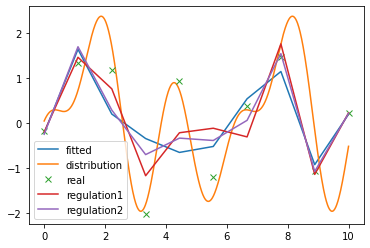

In [6]:
#正则化
class Regularization(object):
    def __init__(self,regulation=0.01,poly=0):
        self.regulation=regulation
        self.poly=poly
        self.w_init=np.random.rand(poly+1)

    def residual_func_regularization1(self,w,x,y):
        res=fit_func(w,x)-y
         #L1范数
        self.res1=np.append(res,self.regulation*np.sqrt(np.square(w)))



        return self.res1
        pass
    def residual_func_regularization2(self,w,x,y):
        res=fit_func(w,x)-y
        self.res2=np.append(res,0.5*self.regulation*np.square(w))
        return self.res2
    def leastsq_res_L1(self):

        self.w_lsq1=leastsq(self.residual_func_regularization1,self.w_init,args=(x_point,y_point))
        return self.w_lsq1[0]


        pass
    def leastsq_res_L2(self):

        self.w_lsq2=leastsq(self.residual_func_regularization2,self.w_init,args=(x_point,y_point))
        return self.w_lsq2[0]

        pass
    def plot(self):

        w_lsq=leastsq(residual_func,np.random.rand(8),args=(x_point,y_point))
        plt.plot(x_point,fit_func(w_lsq[0],x_point),label="fitted")
        plt.plot(x_distrubite,y_distrubite,label="distribution")
        plt.plot(x_point,y_point,"x",label="real")
        plt.plot(x_point,fit_func(self.leastsq_res_L1(),x_point),label="regulation1")
        plt.plot(x_point,fit_func(self.leastsq_res_L2(),x_point),label="regulation2")


        plt.legend()
        pass
    pass
regularization=Regularization(poly=8)
regularization.plot()

